IMPORTING NECESSARY LIBRARIES

In [1]:
import random
import json
import pickle

import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import numpy as np
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt

C:\python3.10.1\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


OBJECT FOR LEMMATIZATION

In [2]:
lemmatizer=WordNetLemmatizer()

In [3]:
lemmatizer = WordNetLemmatizer()

intents = json.loads(open("intentsfarmers.json").read())

words=[]
tags=[]
documents=[]
#corpus=[]

ignore=["?", "!", ".", ","]

for i in intents['intents']:
    t=i['tag']
    if t not in tags:
        tags.append(t)
        
    w=i['patterns']
    for j in w:
        ws=nltk.word_tokenize(j)
        for k in ws:
            if (k not in ignore) and k not in words:
                words.append(lemmatizer.lemmatize(k))
        documents.append((ws, i['tag']))
                
    
                
words=sorted(words)
tags=sorted(tags)

print('WORDS:')
print(words)
print()
print('TAGS:')
print(tags)
print()
print('DOCUMENTS:')
print(documents)

    
    
    
    

WORDS:
["'s", 'Good', 'Hello', 'Hey', 'Hi', 'How', 'I', 'What', 'Where', 'a', 'affect', 'afternoon', 'an', 'are', 'area', 'become', 'benefit', 'benefit', 'best', 'breed', 'can', 'cattle', 'certified', 'condition', 'cover', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'crop', 'current', 'damage', 'deficiency', 'different', 'disease', 'do', 'drought', 'effect', 'effect', 'effective', 'ensure', 'equipment', 'erosion', 'evening', 'event', 'extreme', 'factor', 'farm', 'farmer', 'farming', 'feed', 'fertility', 'find', 'flooding', 'for', 'get', 'give', 'health', 'herd', 'identify', 'implement', 'improve', 'improvement', 'in', 'infestation', 'information', 'irrigation', 'like', 'livestock', 'maintain', 'market', 'method', 'morning', 'most', 'much', 'my', 'need', 'nutrient', 'of', 'often', 'on', 'or', 'organic', 'outbreak', 'over', 'overwatering', 'pest', 'pest', 'pesticide', 'practice', 'precaution', 'prepare', 'prevent', 'price', 'price', 'price', 'price', 'product'

In [4]:
documents[0]

(['Hi'], 'greeting')

In [5]:
data=[]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
len(words)

130

In [8]:
datax=[]
datay=[]

for i in intents['intents']:
    w=i['patterns']
    
    for j in w:
        s=''
        temp=nltk.word_tokenize(j)
        for k in range(len(temp)):
            ws=lemmatizer.lemmatize(temp[k])
            ws=ws.lower()
            temp[k]=ws
        for m in temp:
            if m not in ignore:
                s=s+' '+m
            
        s=s.rstrip()
        s=s.lstrip()
        datax.append(s)
        temp=np.zeros(len(tags))
        temp[tags.index(i['tag'])]=1
        datay.append(temp)
        
            

In [9]:
datax

['hi',
 'hello',
 'hey',
 "what 's up",
 'good morning',
 'good afternoon',
 'good evening',
 'how much water should i give my crop',
 'what are the best irrigation method for my farm',
 'how often should i water my crop',
 'what are the sign of overwatering or underwatering',
 'how can i improve the fertility of my soil',
 'what are the best cover crop for soil improvement',
 'how can i prevent soil erosion on my farm',
 'what are the sign of soil nutrient deficiency',
 'what are the best breed of cattle for my farm',
 'how can i improve the health of my livestock',
 'what are the best feed for my livestock',
 'how can i prevent disease outbreak in my herd',
 'what are the current market price for my crop',
 'how can i get the best price for my farm product',
 'what are the factor that affect market price',
 'where can i find information on market price',
 'how can i prevent pest infestation on my farm',
 'what are the most effective pesticide for my crop',
 'how can i identify differ

In [10]:
datay

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),


In [11]:
print(len(datax))
print(len(datay))

47
47


In [12]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(datax)

In [13]:
result=result.toarray()

In [14]:
result.shape

(47, 108)

In [15]:
datax=result

In [16]:
datax

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21192811,
        0.        ],
       [0.        , 0.        , 0.44213757, ..., 0.        , 0.        ,
        0.        ]])

In [17]:
datay.shape[1]

AttributeError: 'list' object has no attribute 'shape'

In [18]:
datax.shape

(47, 108)

In [19]:
datay=np.array(datay)

In [27]:
model=Sequential()
model.add(Dense(256,input_shape=(108,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(datay.shape[1], activation='softmax'))
 
 
sgd=SGD(learning_rate=0.01, decay=1e-6,
          momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])
 
history = model.fit(datax,datay,
                 epochs=200, batch_size=5, verbose=1)
 
model.save("chatbot.h5", history)
print("Done!")

Epoch 1/200
10/10 [==============================] - 1s 5ms/step - loss: 2.3213 - accuracy: 0.0851
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 2.2812 - accuracy: 0.1277
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 2.2494 - accuracy: 0.1702
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 2.2170 - accuracy: 0.2553
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 2.2045 - accuracy: 0.1702
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 2.1757 - accuracy: 0.2128
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 2.1500 - accuracy: 0.2766
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 2.1046 - accuracy: 0.2340
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 2.0217 - accuracy: 0.2979
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 2.0151 - accuracy: 0.3191
Epoch 11/

10/10 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 84/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 1.0000
Epoch 85/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 86/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 87/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9787
Epoch 88/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 1.0000
Epoch 89/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9787
Epoch 90/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 91/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 1.0000
Epoch 92/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 93/200


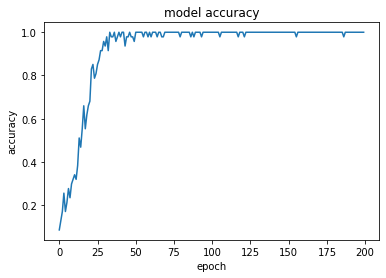

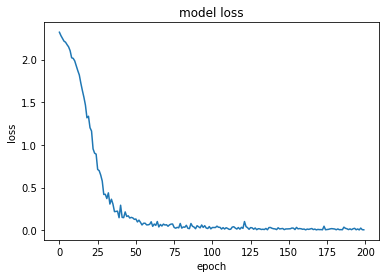

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [17]:
def queryprocess(query):
    s=''
    for i in range(len(query)):
        q=query[i]
        q=lemmatizer.lemmatize(q)
        q=q.lower()
        if q not in ignore:
            s=s+' '+q
    s=s.lower()
    s=s.lstrip()
    s=s.rstrip()
    return s

In [18]:
def SpeakText(command):
    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(command)
    engine.runAndWait()


In [21]:
def chat():
    
    r = sr.Recognizer()

    print('ENTER -QUIT- TO END')
    while True:
        try:
            # use the microphone as source for input.
            with sr.Microphone() as source2:

                # wait for a second to let the recognizer
                # adjust the energy threshold based on
                # the surrounding noise level
                r.adjust_for_ambient_noise(source2, duration=0.2)

                #listens for the user's input
                audio2 = r.listen(source2)

                # Using google to recognize audio
                query= r.recognize_google(audio2)
        except sr.RequestError as e:
                print("Could not request results; {0}".format(e))
                continue

        except sr.UnknownValueError:
                SpeakText("unknown error occurred")
                continue
        query=query.lower()
        if query=='quit':
            break
        query=nltk.word_tokenize(query)
        s=queryprocess(query)
        finq=tfidf.transform([s])
        finq=finq.toarray()
        a=model.predict(finq)
        idx=np.argmax(a)
        if a[0][idx]>0.6:
            t=tags[idx]
            for i in range(len(tags)):
                if t.lower()==intents['intents'][i]['tag'].lower():
                    response=random.choice(intents['intents'][i]['responses'])
                    SpeakText(response)
                    print(response)
                    break
                    
                    
            
        else:
            SpeakText("SORRY, I DIDN'T UNDERSTAND")
        
        



    
    
    
    



In [23]:
chat()

ENTER -QUIT- TO END
1/1 [==============================] - 0s 111ms/step
Good morning! How may I help you today?
1/1 [==============================] - 0s 16ms/step
Good evening! What brings you here today?
1/1 [==============================] - 0s 42ms/step
The best irrigation method for your farm depends on factors such as your soil type, crop type, and water availability.
1/1 [==============================] - 0s 33ms/step
Hello! How can I assist you today?
1/1 [==============================] - 0s 21ms/step
Hey! What brings you here today?
1/1 [==============================] - 0s 20ms/step
Good evening! What brings you here today?
1/1 [==============================] - 0s 24ms/step
Hi! How can I be of assistance?
1/1 [==============================] - 0s 25ms/step
Signs of soil nutrient deficiencies can include yellowing leaves, stunted growth, and poor crop yields. You can get a soil test done to determine the nutrient levels of your soil.
1/1 [==============================] - 0

KeyboardInterrupt: 